# IS 362 - Week 8 Assignment

## Overview
The "Auto MPG" dataset from the UC Irvine data repository was loaded, cleaned up, and exploratory data anlysis was used to learn about the distribution of variables and the realtionship between them.  

## Load Data
The data was loaded and read into pandas and a DataFrame was created. 

In [35]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the data
file_path = '/home/lb24370531/IS 362/auto-mpg.data'  # Ensure this path is correct

# create column names
columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name',
]
 
# create DataFrame, set column, names, and replace blank and "?" values with NaN
auto_mpg = pd.read_csv(file_path, delim_whitespace=True, names=columns)

#print DataFrame
auto_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## Clean Data
The data was cleaned by replacing missing values, ensuring all column names and values are descriptive, and checking data types.

In [51]:
# replace "" or "?" witn NaN
auto_mpg_tidy = auto_mpg.replace({"": np.nan, "?": np.nan})

auto_mpg_tidy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [50]:
# convert horespower column to numeric
auto_mpg_tidy['horsepower'] = pd.to_numeric(auto_mpg_tidy['horsepower'], errors='coerce')

print(auto_mpg_tidy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [53]:
# convert origin values 1, 2, and 3 to 'USA', 'Asia', and 'Europe' respectively
auto_mpg_tidy['origin'] = auto_mpg_tidy['origin'].replace({1:'USA', 2: 'Asia', 3: 'Europe'})

# print DataFrame
auto_mpg_tidy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,USA,ford ranger


## Exploratory Data Analysis

### Vizualization of the DIstribution for Cylinders


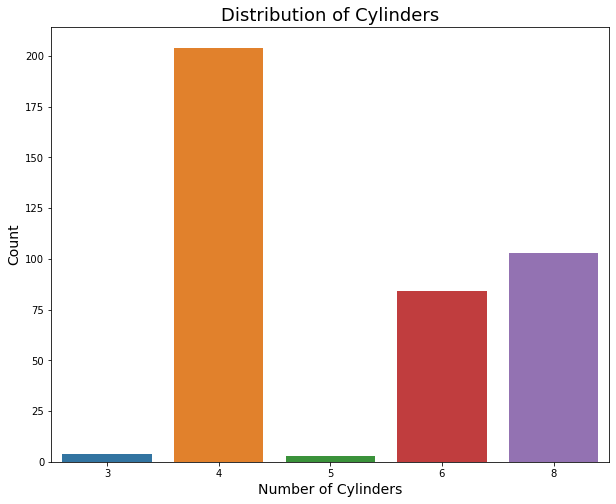

In [65]:
plt.figure(figsize=(10, 8))
sns.countplot(data=auto_mpg_tidy, x='cylinders')
plt.title('Distribution of Cylinders', fontsize=18)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Number of Cylinders', fontsize=14)
plt.show()

### Vizualization of the Relationship Between Horsepower and Weight

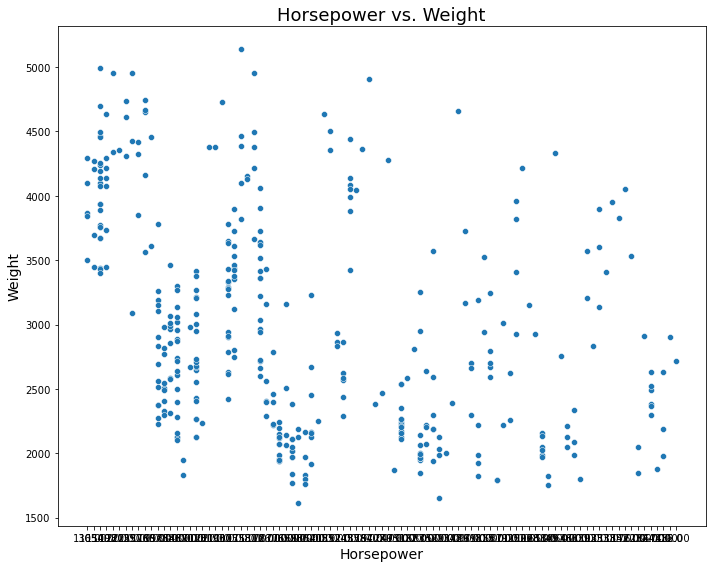

In [99]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=auto_mpg_tidy, x= 'horsepower', y= 'weight')
plt.title('Horsepower vs. Weight', fontsize=18)
plt.ylabel('Weight', fontsize=14)
plt.xlabel('Horsepower', fontsize=14)
#plt.xlim(0, 300)
plt.xticks(range(0, 300))
plt.tight_layout()
plt.show()

### How does the proportion of cars from different origins change across model years?

<Figure size 720x432 with 0 Axes>

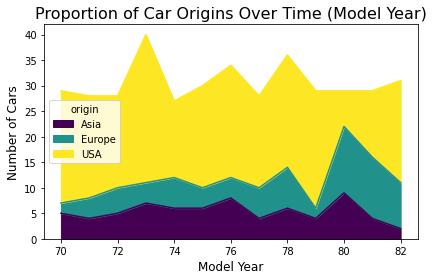

In [87]:
origin_counts = auto_mpg_tidy.groupby(['model_year', 'origin']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
origin_counts.plot.area(stacked=True, cmap='viridis')

plt.title('Proportion of Car Origins Over Time (Model Year)', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

plt.tight_layout()
plt.show()